# Figures from Cure+Survival model

In [24]:
library(ggplot2)
library(cowplot)
library(forcats)
# Load data for figues
load('fig_data.RData')

In [25]:
ls()

[1] "dat_p"    "df_auroc" "df_bhat"  "df_conc"

## Figure 1: Leave-one-out AUROC distribution 

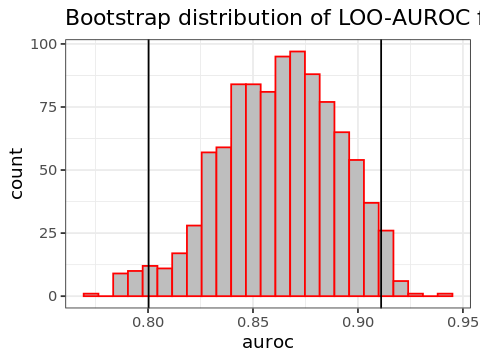

In [12]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(df_auroc,aes(x=auroc)) + geom_histogram(fill='grey',color='red',bins=25) + 
  geom_vline(xintercept = quantile(df_auroc$auroc,0.025)) + 
  geom_vline(xintercept = quantile(df_auroc$auroc,0.975)) + 
  theme_bw() + ggtitle('Bootstrap distribution of LOO-AUROC for Cure Model')

## Figure 2: Empirical CDF of cure probabilities

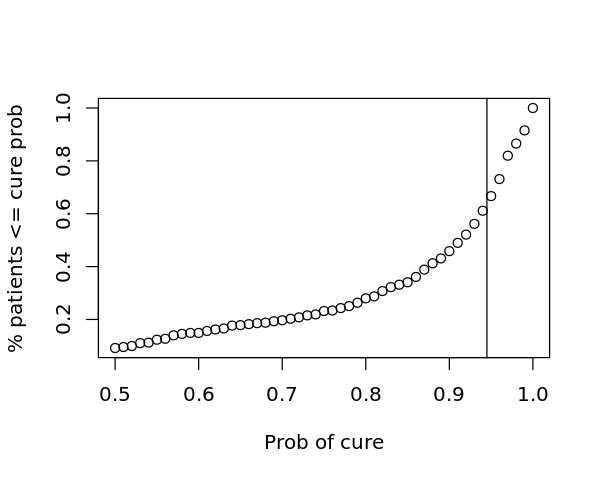

In [17]:
options(repr.plot.width=5, repr.plot.height=4)
plot(dat_p$p, dat_p$m,xlab = 'Prob of cure', ylab = '% patients <= cure prob')
abline(v=0.945)

## Figure 3: Leave-one-out concordance distribution

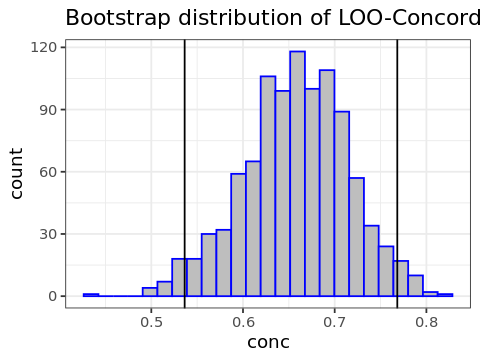

In [21]:
options(repr.plot.width=4, repr.plot.height=3)

ggplot(df_conc,aes(x=conc)) + geom_histogram(fill='grey',color='blue',bins=25) + 
  geom_vline(xintercept = quantile(df_conc$conc,0.025)) + 
  geom_vline(xintercept = quantile(df_conc$conc,0.975)) + 
  theme_bw() + ggtitle('Bootstrap distribution of LOO-Concordance for Survival Model')

## Figure 4: Post selection inference

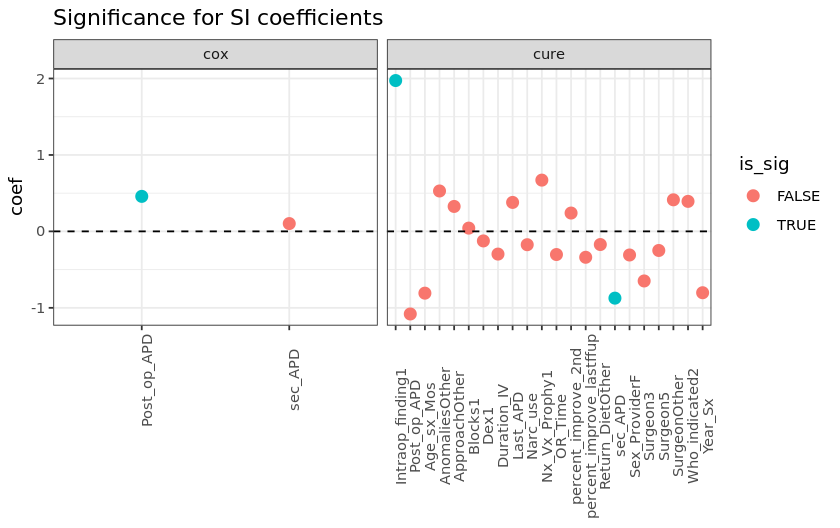

In [30]:
options(repr.plot.width=7, repr.plot.height=4.4)
ggplot(df_bhat, aes(x=fct_reorder2(cn,coef,is_sig), y=coef,color=is_sig)) + 
  geom_point(size=3) + facet_wrap(~tt,scales='free_x') + 
  theme_bw() + ggtitle('Significance for SI coefficients') + 
  theme(axis.title.x = element_blank(), axis.text.x = element_text(angle=90)) + 
  geom_hline(yintercept = 0, linetype='dashed')